# Assignment-1
- **Problem-1**
- **ID=160204008**


- **Logistic Regression**
    - Output: probability [0, 1] given input belonging to a class



**Logistic Regression Proplem:** 
   -
*   Apply only **logistic regression** for the **NumtaDB** dataset and build a multiclass classification model that can recognize `[0-9]` Bengali handwritten digits with different hyperparameter settings. 

**Snapshot from NumtaDB**

<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>


### **NumtaDB: Bengali Handwritten Digits**

**Dataset Link:** https://www.kaggle.com/BengaliAI/numta/


**Input:** Bengali digits 0-9 images

**Output:** Probability of that image being that digit


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


In [1]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
PATH = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/'
os.listdir(PATH)

['archive.zip',
 'model',
 'testing-a',
 'testing-all-corrected',
 'testing-auga',
 'testing-augc',
 'testing-b',
 'testing-c',
 'testing-d',
 'testing-e',
 'testing-f',
 'train',
 'training-a',
 'training-a.csv',
 'training-a.csv.zip',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

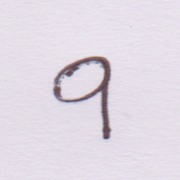

In [3]:
from PIL import Image
data_dir = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-a'
name = os.listdir(data_dir)[10]
Image.open(data_dir+"/"+name)

### Showing Samples

In [4]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [5]:
a_csv = showRawTrainingSamples('training-a.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')


In [6]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [7]:
a_csv = dropColumns(a_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]
     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7
         filename  digit
0      d00000.png      1
1      d00001.png      1
2      d00002.png    

In [8]:
a_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-a.csv')
a_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [9]:
a_csv = a_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
a_csv.iloc[:11, 0:]

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
5,a00005.png,4
6,a00006.png,3
7,a00007.png,0
8,a00008.png,4
9,a00009.png,9


In [10]:
c_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-c.csv')
c_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [11]:
c_csv = c_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
c_csv.iloc[:10, 0:]

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
5,c00005.png,3
6,c00006.png,4
7,c00007.png,7
8,c00008.png,5
9,c00009.png,3


In [12]:
d_csv = pd.read_csv('C:/Users/Mayeesha/Desktop/sc/NumtaDB/training-c.csv')
d_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [13]:
d_csv = d_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
d_csv.iloc[:10, 0:]

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
5,c00005.png,3
6,c00006.png,4
7,c00007.png,7
8,c00008.png,5
9,c00009.png,3


In [14]:
#Concating 3 csv
total_csv = [a_csv, c_csv, d_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

68298


In [15]:
TRAIN_PATH = 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/train'

In [ ]:
#making folder train
os.mkdir(TRAIN_PATH)

In [20]:
def processImages(folder_name):
    src = PATH + folder_name + '/'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, TRAIN_PATH) 

In [21]:
#copying images of three folder to train folder
processImages('training-a')
print('A Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')

A Done
C Done
D Done


In [16]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [17]:
# Normalizing data
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  68298


# Combination-1:
## iteration=3000, epoch=5, lr=0.001, batch size=120, optimizer=SGD

In [89]:
# Hyperparameters

batch_size = 120
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [90]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

5


In [91]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:513
Test dataloader:57


In [92]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [93]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [94]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [95]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.3069472312927246. Accuracy: 11.934397422755893
1
Iteration: 1000. Loss: 2.29158616065979. Accuracy: 13.881973934690292
2
Iteration: 1500. Loss: 2.256579875946045. Accuracy: 18.787523795577684
3
Iteration: 2000. Loss: 2.26163911819458. Accuracy: 21.174403280128864
4
Iteration: 2500. Loss: 2.2520291805267334. Accuracy: 19.036462146727192


In [96]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model3/combination1.pkl') 

[2.3069472312927246, 2.29158616065979, 2.256579875946045, 2.26163911819458, 2.2520291805267334]


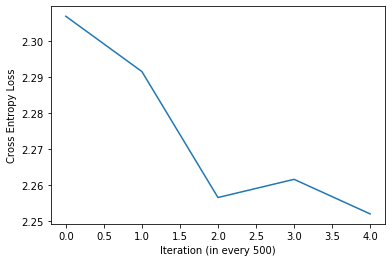

In [97]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Combination-2:
## iteration=3000, epoch=10, lr=0.001, batch size=230, optimizer=SGD

In [98]:
# Hyperparameters

batch_size = 230
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [99]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

10


In [100]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:268
Test dataloader:30


In [101]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.244262218475342. Accuracy: 26.577829843315275
2
3
Iteration: 1000. Loss: 2.2322945594787598. Accuracy: 29.50651632742715
4
5
Iteration: 1500. Loss: 2.2331221103668213. Accuracy: 30.1361839215112
6
7
Iteration: 2000. Loss: 2.2181556224823. Accuracy: 29.96046273246449
8
9
Iteration: 2500. Loss: 2.2094781398773193. Accuracy: 31.864108947137208


In [102]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model3/combination2.pkl') 

[2.244262218475342, 2.2322945594787598, 2.2331221103668213, 2.2181556224823, 2.2094781398773193]


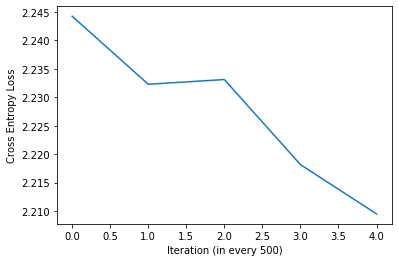

In [103]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Combination-4:
## iteration=3000 epoch=20, lr=0.001, batch size=460, optimizer=SGD

In [104]:
# Hyperparameters

batch_size = 460
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [105]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [106]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:134
Test dataloader:15


In [107]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
2
3
Iteration: 500. Loss: 2.207247495651245. Accuracy: 32.17162102796895
4
5
6
7
Iteration: 1000. Loss: 2.1943366527557373. Accuracy: 31.703031190511055
8
9
10
11
Iteration: 1500. Loss: 2.1915149688720703. Accuracy: 32.25948162249231
12
13
14
Iteration: 2000. Loss: 2.1708056926727295. Accuracy: 32.64021086542686
15
16
17
18
Iteration: 2500. Loss: 2.1856322288513184. Accuracy: 33.75311172938937
19


In [108]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model3/combination3.pkl') 

[2.207247495651245, 2.1943366527557373, 2.1915149688720703, 2.1708056926727295, 2.1856322288513184]


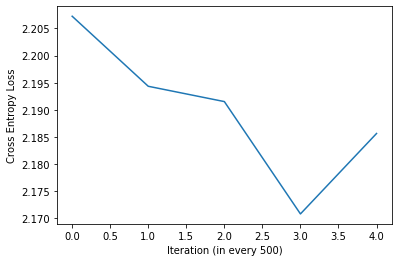

In [109]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Combination-4:
## iteration=3000 epoch=20, lr=0.001, batch size=460, optimizer=Adam

In [110]:
# Hyperparameters

batch_size = 460
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.001


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [111]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [112]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [113]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:134
Test dataloader:15


In [114]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
2
3
Iteration: 500. Loss: 1.9937291145324707. Accuracy: 36.242495240884466
4
5
6
7
Iteration: 1000. Loss: 1.9099231958389282. Accuracy: 37.09181432127691
8
9
10
11
Iteration: 1500. Loss: 1.8247947692871094. Accuracy: 40.47444721042612
12
13
14
Iteration: 2000. Loss: 1.8085525035858154. Accuracy: 40.82588958851955
15
16
17
18
Iteration: 2500. Loss: 1.941252589225769. Accuracy: 42.70024893835115
19


In [115]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model3/combination4.pkl') 

[1.9937291145324707, 1.9099231958389282, 1.8247947692871094, 1.8085525035858154, 1.941252589225769]


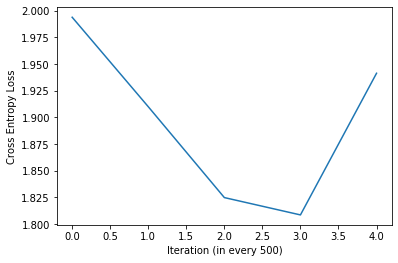

In [116]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Combination-5:
## iteration=5000 epoch=20, lr=0.0001, batch size=280, optimizer=Adam

In [77]:
# Hyperparameters

batch_size = 280
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [78]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [79]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:220
Test dataloader:25


In [80]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
2
Iteration: 500. Loss: 1.7800264358520508. Accuracy: 43.080978181285694
3
4
Iteration: 1000. Loss: 1.7824878692626953. Accuracy: 45.599648557621904
5
6
Iteration: 1500. Loss: 1.7633532285690308. Accuracy: 42.612388343827796
7
8
9
Iteration: 2000. Loss: 1.6175463199615479. Accuracy: 44.36960023429492
10
11
Iteration: 2500. Loss: 1.7912322282791138. Accuracy: 44.39888709913604
12
13
Iteration: 3000. Loss: 1.8514009714126587. Accuracy: 45.52643139551911
14
15
Iteration: 3500. Loss: 1.8399043083190918. Accuracy: 43.91565382925758
16
17
18
Iteration: 4000. Loss: 1.7722166776657104. Accuracy: 45.29213647679016
19


In [81]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model2/combination5.pkl') 

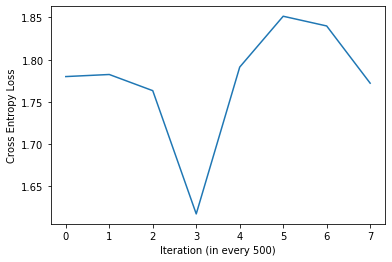

In [82]:
import matplotlib
import matplotlib.pyplot as plt

#print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Combination-6:
## iteration=5000 epoch=25, lr=0.0001, batch size=350, optimizer=Adam

In [83]:
# Hyperparameters

batch_size = 350
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 10
save_model = True

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [84]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

25


In [85]:
#batch size
#batch_size = 32

# split data 20% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:176
Test dataloader:20


In [86]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
2
Iteration: 500. Loss: 1.8288054466247559. Accuracy: 45.99502123297701
3
4
5
Iteration: 1000. Loss: 1.7717663049697876. Accuracy: 45.907160638453654
6
7
8
Iteration: 1500. Loss: 1.8274818658828735. Accuracy: 46.361107043490996
9
10
11
Iteration: 2000. Loss: 1.701633334159851. Accuracy: 46.185385854444284
12
13
14
Iteration: 2500. Loss: 1.8718883991241455. Accuracy: 45.24820617952848
15
16
17
Iteration: 3000. Loss: 1.7475001811981201. Accuracy: 45.907160638453654
18
19
Iteration: 3500. Loss: 1.7567139863967896. Accuracy: 46.05359496265925
20
21
22
Iteration: 4000. Loss: 1.7526792287826538. Accuracy: 46.09752525992093
23
24


In [87]:
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), 'C:/Users/Mayeesha/Desktop/sc/NumtaDB/model2/combination6.pkl') 

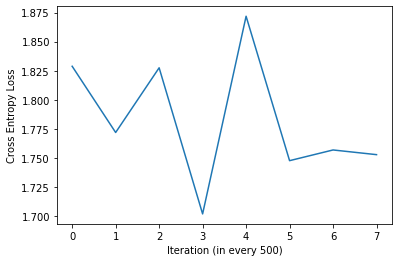

In [88]:
import matplotlib
import matplotlib.pyplot as plt

#print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Testing Best Model
Best Model: Combination-6

In [117]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load('C:/Users/Mayeesha/Desktop/sc/NumtaDB/model3/combination6.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


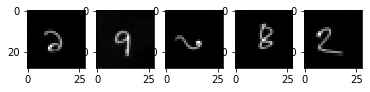

In [124]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [125]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [1 7 2 4 2]


### Accuracies obtained for different Hyperparameters

Combination|Iteration| Epoch | Learning Rate | Batch Size | Optimizer | Accuracy | Loss |
-----------|---------|-------|---------------|------------|-----------|----------|------|
    1      |3000     |5      |0.001          |120         |SGD        |32.947    |2.129 |
    2      |3000     |10     |0.001          |230         |SGD        |37.999    |1.788 |
    3      |3000     |20     |0.001          |460         |SGD        |40.606    |2.060 |
    4      |3000     |20     |0.001          |460         |Adam       |41.338    |1.883 |
    5      |5000     |20     |0.0001         |280         |Adam       |42.568    |1.997 |
    6      |5000     |25     |0.0001         |350         |Adam       |***43.564***    |1.726 |
   

- **How hyperparameters were chosen**
    - Firstly, 3 different epochs 5, 10 and 20 were picked as hyperparameter for iteration=3000, learning rate=0.001 and optimizer=SGD
    - It was seen that combination having 20 epoch performed better hence it was chosen
    - Then for the same combination of 20 epoch Adam optimizer was chosen and it could be seen tha it performen better than before
    - Then with adam optimizer leraning rate=0.0001 and iteration=5000 was taken and it could be seen that accuracy increased
    - Lastly, Epoch of Combinaton-5 was increased and it could be seen thah this combination berformed the best

### ** Combination-6 performed the best**
